<a href="https://colab.research.google.com/github/ritik619/Notebook/blob/master/pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
img_path = path/'images'
ann_path = path/'annotations'

In [6]:
fnames = get_image_files(img_path) ;fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_100.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_34.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_24.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_98.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_100.jpg')]

In [7]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(img_path,fnames,pat,ds_tfms=get_transforms(),valid_pct=0.2,size=224,bs=256).normalize(imagenet_stats)

In [9]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,Persian,miniature_pinscher,havanese,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
wheaten_terrier,Russian_Blue,german_shorthaired,Sphynx,miniature_pinscher
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [10]:
learn = cnn_learner(data,models.resnet18,metrics=error_rate ,pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.004117,0.472061,0.150880,01:49
1,1.526376,0.304930,0.096076,01:46
2,0.975552,0.286937,0.099459,01:44
3,0.698408,0.268610,0.089986,01:45
4,0.537320,0.263145,0.090663,01:44


In [13]:
learn.save('stage-1')

In [17]:
learn.freeze_to(-3)

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-06
Min loss divided by 10: 6.92E-05


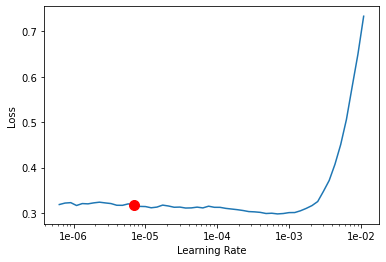

In [20]:
learn.recorder.plot(suggestion=True)

In [23]:
learn.fit_one_cycle(3,3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.231978,0.316359,0.100135,01:50
1,0.225958,0.267777,0.086604,01:51
2,0.190833,0.227847,0.073072,01:52


In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 7.59E-06


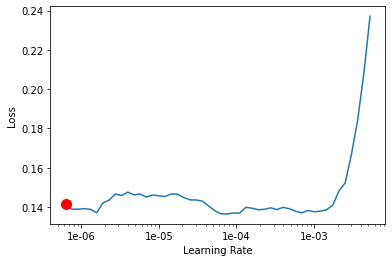

In [25]:
learn.recorder.plot(suggestion=True)

In [26]:
learn.save('stage-2')

In [27]:
learn.fit_one_cycle(2,slice(8e-5,8e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.144000,0.257902,0.085250,01:50
1,0.125075,0.214149,0.066306,01:51


In [28]:
learn.save('stage-3')

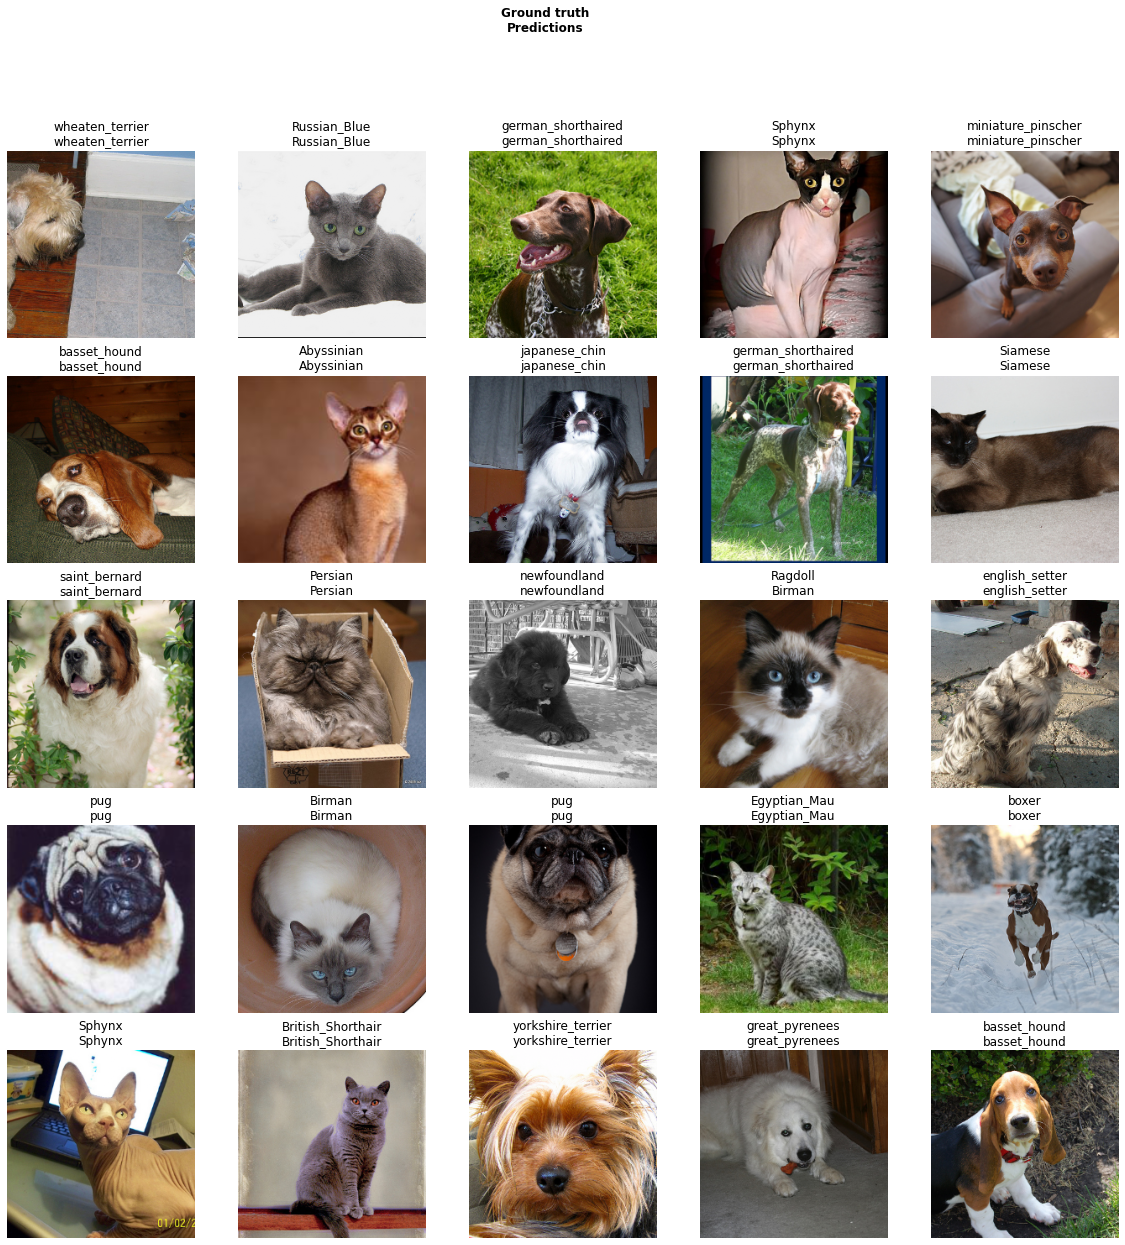

In [29]:
learn.show_results()

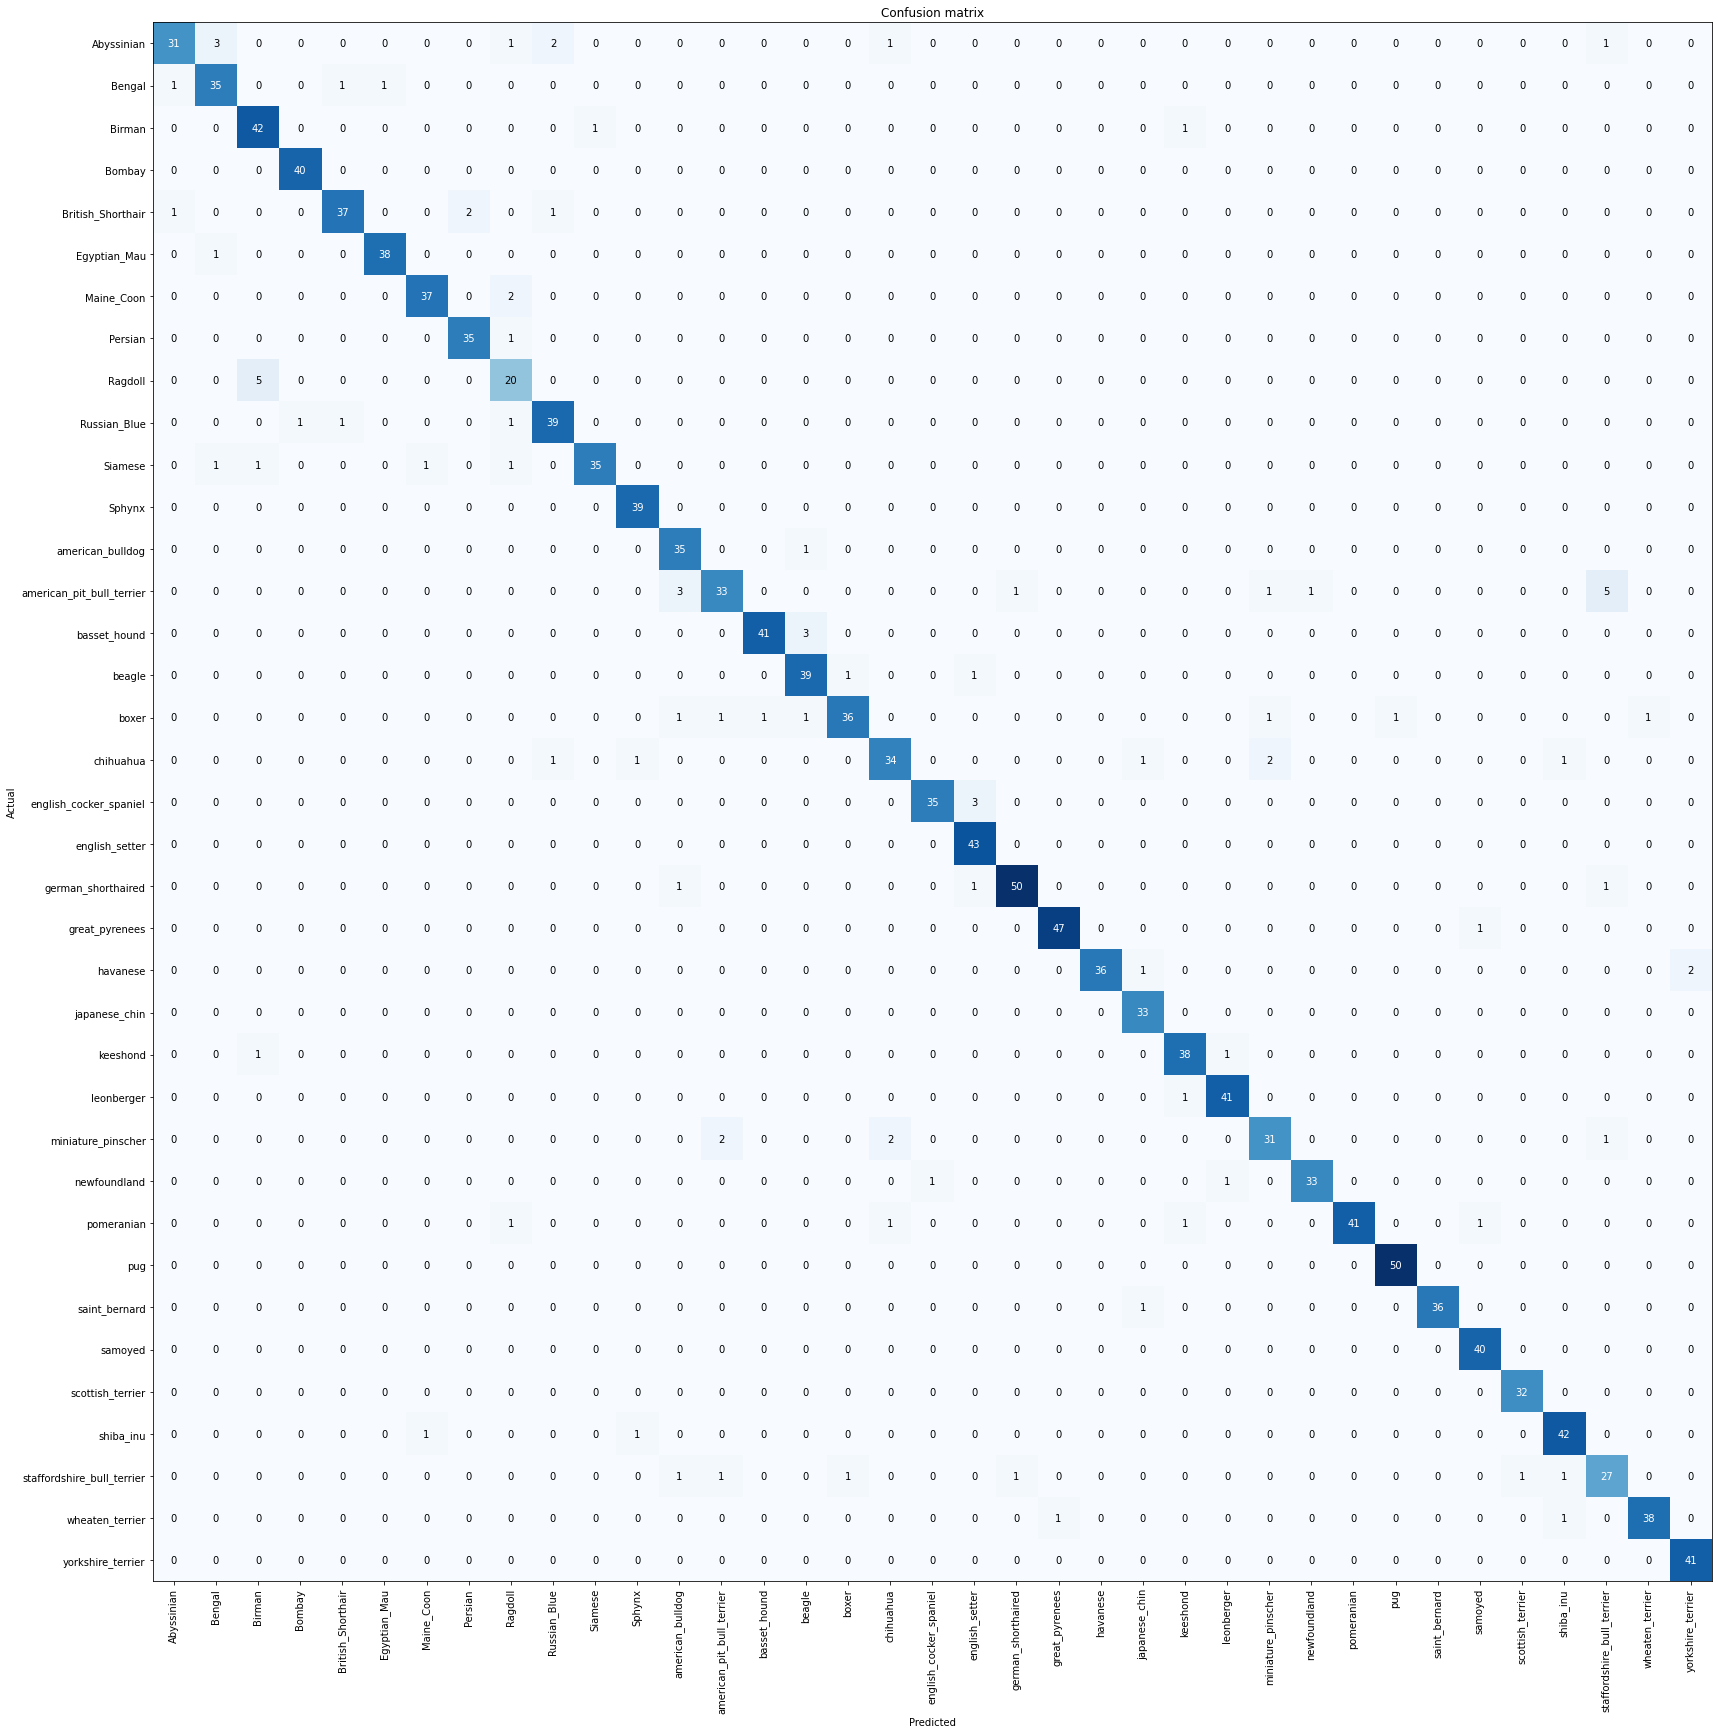

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(24,24))